# Kết nối một website để lấy dữ liệu

Tìm hiểu và sử dụng một API kết nối một website để lấy dữ liệu về. Khuyến khích chọn một trong các loại dữ liệu: Covid, thời tiết, tỉ giá hối đoái,...

## Thực hiện

### Nhóm sinh viên

- A36000 - Lê Anh Đức
- A35786 - Nguyễn Thu Hường
- A35981 - Ngụy Thị Ngọc Oanh

### Giáo viên hướng dẫn

- CTI008 - Mai Thuý Nga

## Web Scraping

Một số trang web có thể chứa một lượng rất lớn dữ liệu vô giá, như giá cổ phiếu, chi tiết sản phẩm, số liệu thống kê thể thao, thông tin liên hệ của công ty, v.v...

Nếu muốn truy cập thông tin này, bạn phải sử dụng bất kỳ định dạng nào mà trang web sử dụng hoặc sao chép và dán thông tin theo cách thủ công vào một tài liệu mới. Quá trình này gọi là web scraping hay data scraping. Vậy làm sao để thực hiện Scraping một trang web?

Để hiểu rõ hơn hãy cùng chúng mình tìm hiểu và phân tích dữ liệu về Covid nhé!

## Phân tích dữ liệu về Covid

Đại dịch COVID-19 đã thay đổi hoàn toàn thế giới mà chúng ta đang sống, và các giao thức cũng như hoạt động kinh doanh toàn cầu cũng không phải là ngoại lệ. Các công ty/doanh nghiệp trên khắp thế giới đang thực hiện các biện pháp điều chỉnh hợp lý để đứng vững trong cuộc chiến chống lại vi-rút corona.

Với hơn 277 triệu ca dương tính (tính đến ngày 24/12/2021) trên toàn thế giới, vi-rút corona không chỉ làm gián đoạn cuộc sống hàng ngày của chúng ta mà còn thay đổi hoàn toàn hình thức và phương thức kinh doanh. Vì vậy, việc phân tích dữ liệu về Covid là vô cùng quan trọng và cần thiết.

## Giới thiệu về API được sử dụng

Để tiến hành phần tích dữ liệu về Covid thì một API đủ lớn và chính xác là rất quan trọng. Ở đây, chúng ta sẽ sử dụng
API của trang **covid19api.com** - Một API miễn phí cho dữ liệu về Coronavirus nổi tiếng trên toàn thế giới!

### API được hỗ trợ bởi

- Digital Ocean
- Travel Advice
- Daemon Solutions

## Tiến hành phân tích dữ liệu

### Import thư viện

In [545]:
# tính toán
import numpy as np
# phân tích, đọc dữ liệu
import pandas as pd
# vẽ biểu đồ
import matplotlib.pyplot as plt
# gửi yêu cầu HTTP qua các dịch vụ web API
import requests
# làm việc với file json
import json
# trích xuất các thông tin
from bs4 import BeautifulSoup

### Liệt kê tất cả các trường có trong API

Chúng ta sẽ gửi request đến API để cào dữ liệu về. Sau khi gọi các phương thức tương ứng để **request**, ta sẽ có đối tượng thuộc class **Response**. Đối tượng này có một số thông tin như sau:

- `status_code`: HTTP Status server trả về
- `payload`: Chứa data để truyền data lên kèm request
- `headers`: Các thông tin header mà server trả về dưới dạng Dictionary.
- `cookies`: Nếu server có trả về cookie thì có thể sử dụng thuộc tính này để lấy các cookie.
- `text`: Trả về nội dung response

In [546]:
# Gửi requests đến API
url = "https://api.covid19api.com/"
payload = {}
headers = {}
response = requests.request("GET", url, headers = headers, data = payload)
# Chuyển dữ liệu về dạng json
scraping = response.json()
# In toàn bộ dữ liệu có trong API
scraping

{'countriesRoute': {'Name': 'Get List Of Countries',
  'Description': 'Returns all countries and associated provinces. The country_slug variable is used for country specific data',
  'Path': '/countries'},
 'countryDayOneRoute': {'Name': 'Get List Of Cases Per Country Per Province By Case Type From The First Recorded Case',
  'Description': 'Returns all cases by case type for a country from the first recorded case. Country must be the country_slug from /countries. Cases must be one of: confirmed, recovered, deaths',
  'Path': '/dayone/country/:country'},
 'countryDayOneTotalRoute': {'Name': 'Get List Of Cases Per Country By Case Type From The First Recorded Case',
  'Description': 'Returns all cases by case type for a country from the first recorded case. Country must be the country_slug from /countries. Cases must be one of: confirmed, recovered, deaths',
  'Path': '/total/dayone/country/:country'},
 'countryRoute': {'Name': 'Get List Of Cases Per Country Per Province By Case Type',
 

#### Đếm số lượng mục có trong API gốc

In [547]:
rootAPI = "https://api.covid19api.com"

In [548]:
print("Số lượng items:", len(scraping))

Số lượng items: 22


#### Một số API được sử dụng

Theo kết quả phân tích ở trên thì có tổng cộng tất cả là **22** API con trong API gốc cho chúng ta dữ liệu về Covid. Ở đây, chúng ta sẽ chỉ tập chung phân tích một số API nổi bật cho kết quả chính xác.

##### API liệt kê danh sách các quốc gia

Liệt kê danh sách các quốc gia đã được thu thập dữ liệu

In [549]:
countries = scraping["countriesRoute"]
data = {
    'List': [
        "Tên API",
        "Mô tả",
        "Đường dẫn",
    ],
    'Values': [
        countries["Name"],
        countries["Description"],
        countries["Path"],
    ]
}
table = pd.DataFrame(data, columns = [
    'List', 'Values'
])
table

,List,Values
0,Tên API,Get List Of Countries
1,Mô tả,Returns all countries and associated provinces...
2,Đường dẫn,/countries


In [550]:
print("Link API:", rootAPI + countries["Path"])

Link API: https://api.covid19api.com/countries


##### API thống kê toàn bộ tình hình Covid trên toàn thế giới và từng quốc gia

Thống kê toàn bộ dữ liệu Covid trên toàn thế giới và từng quốc gia

In [551]:
summary = scraping["summaryRoute"]
data = {
    'List': [
        "Tên API",
        "Mô tả",
        "Đường dẫn",
    ],
    'Values': [
        summary["Name"],
        summary["Description"],
        summary["Path"],
    ]
}
table = pd.DataFrame(data, columns = [
    'List', 'Values'
])
table

,List,Values
0,Tên API,Summary of new and total cases per country
1,Mô tả,A summary of new and total cases per country
2,Đường dẫn,/summary


In [552]:
print("Link API:", rootAPI + summary["Path"])

Link API: https://api.covid19api.com/summary


##### API liệt kê tất cả các trường hợp theo quốc gia

Liệt kê toàn bộ dữ theo quốc gia từ ngày bắt đầu cho đến hiện tại

In [553]:
country = scraping["countryDayOneRoute"]
data = {
    'List': [
        "Tên API",
        "Mô tả",
        "Đường dẫn",
    ],
    'Values': [
        country["Name"],
        country["Description"],
        country["Path"],
    ]
}
table = pd.DataFrame(data, columns = [
    'List', 'Values'
])
table

,List,Values
0,Tên API,Get List Of Cases Per Country Per Province By ...
1,Mô tả,Returns all cases by case type for a country f...
2,Đường dẫn,/dayone/country/:country


In [554]:
print("Link API:", rootAPI + country["Path"])

Link API: https://api.covid19api.com/dayone/country/:country


### Phân tích API

Từ trên, ta chọn được **3** API nổi bật để tiến hành phân tích dữ liệu:
- API liệt kê danh sách các quốc gia
- API thống kê toàn bộ tình hình Covid trên toàn thế giới và từng quốc gia
- API liệt kê tất cả các trường hợp theo quốc gia

#### Liệt kê tất cả các quốc gia được thu thập dữ liệu

Ở đây, chúng ta sẽ sử dụng API liệt kê danh sách các quốc gia.

- Link API: https://api.covid19api.com/countries

In [555]:
url = "https://api.covid19api.com/countries"
payload = {}
headers = {}
response = requests.request("GET", url, headers = headers, data = payload)
scraping = response.json()
scraping

[{'Country': 'China', 'Slug': 'china', 'ISO2': 'CN'},
 {'Country': 'Guatemala', 'Slug': 'guatemala', 'ISO2': 'GT'},
 {'Country': 'Seychelles', 'Slug': 'seychelles', 'ISO2': 'SC'},
 {'Country': 'Mayotte', 'Slug': 'mayotte', 'ISO2': 'YT'},
 {'Country': 'France', 'Slug': 'france', 'ISO2': 'FR'},
 {'Country': 'Iran, Islamic Republic of', 'Slug': 'iran', 'ISO2': 'IR'},
 {'Country': 'Aruba', 'Slug': 'aruba', 'ISO2': 'AW'},
 {'Country': 'Canada', 'Slug': 'canada', 'ISO2': 'CA'},
 {'Country': 'Georgia', 'Slug': 'georgia', 'ISO2': 'GE'},
 {'Country': 'Heard and Mcdonald Islands',
  'Slug': 'heard-and-mcdonald-islands',
  'ISO2': 'HM'},
 {'Country': 'Bahamas', 'Slug': 'bahamas', 'ISO2': 'BS'},
 {'Country': 'Togo', 'Slug': 'togo', 'ISO2': 'TG'},
 {'Country': 'Greenland', 'Slug': 'greenland', 'ISO2': 'GL'},
 {'Country': 'Luxembourg', 'Slug': 'luxembourg', 'ISO2': 'LU'},
 {'Country': 'Paraguay', 'Slug': 'paraguay', 'ISO2': 'PY'},
 {'Country': 'United Arab Emirates',
  'Slug': 'united-arab-emirates'

##### Đếm số quốc gia

In [556]:
countries = scraping
print("Tổng số quốc gia:", len(countries))

Tổng số quốc gia: 248


##### Liệt kê theo hàng

In [557]:
for item in countries:
    print("Quốc gia: {}\nURL: {}\nMã quốc gia: {}\n"
          .format(
              item["Country"],
              item["Slug"],
              item["ISO2"]
          )
    )

Quốc gia: China
URL: china
Mã quốc gia: CN

Quốc gia: Guatemala
URL: guatemala
Mã quốc gia: GT

Quốc gia: Seychelles
URL: seychelles
Mã quốc gia: SC

Quốc gia: Mayotte
URL: mayotte
Mã quốc gia: YT

Quốc gia: France
URL: france
Mã quốc gia: FR

Quốc gia: Iran, Islamic Republic of
URL: iran
Mã quốc gia: IR

Quốc gia: Aruba
URL: aruba
Mã quốc gia: AW

Quốc gia: Canada
URL: canada
Mã quốc gia: CA

Quốc gia: Georgia
URL: georgia
Mã quốc gia: GE

Quốc gia: Heard and Mcdonald Islands
URL: heard-and-mcdonald-islands
Mã quốc gia: HM

Quốc gia: Bahamas
URL: bahamas
Mã quốc gia: BS

Quốc gia: Togo
URL: togo
Mã quốc gia: TG

Quốc gia: Greenland
URL: greenland
Mã quốc gia: GL

Quốc gia: Luxembourg
URL: luxembourg
Mã quốc gia: LU

Quốc gia: Paraguay
URL: paraguay
Mã quốc gia: PY

Quốc gia: United Arab Emirates
URL: united-arab-emirates
Mã quốc gia: AE

Quốc gia: French Polynesia
URL: french-polynesia
Mã quốc gia: PF

Quốc gia: Bhutan
URL: bhutan
Mã quốc gia: BT

Quốc gia: Cambodia
URL: cambodia
Mã q

##### Liệt kê theo bảng

In [558]:
for item in countries:
    data = {
        'List': [
            "Quốc gia",
            "URL",
            "Mã quốc gia",
        ],
        'Values': [
            item["Country"],
            item["Slug"],
            item["ISO2"],
        ]
    }
    table = pd.DataFrame(data, columns = [
        'List', 'Values'
    ])
    print(table)
    print("")

          List Values
0     Quốc gia  China
1          URL  china
2  Mã quốc gia     CN

          List     Values
0     Quốc gia  Guatemala
1          URL  guatemala
2  Mã quốc gia         GT

          List      Values
0     Quốc gia  Seychelles
1          URL  seychelles
2  Mã quốc gia          SC

          List   Values
0     Quốc gia  Mayotte
1          URL  mayotte
2  Mã quốc gia       YT

          List  Values
0     Quốc gia  France
1          URL  france
2  Mã quốc gia      FR

          List                     Values
0     Quốc gia  Iran, Islamic Republic of
1          URL                       iran
2  Mã quốc gia                         IR

          List Values
0     Quốc gia  Aruba
1          URL  aruba
2  Mã quốc gia     AW

          List  Values
0     Quốc gia  Canada
1          URL  canada
2  Mã quốc gia      CA

          List   Values
0     Quốc gia  Georgia
1          URL  georgia
2  Mã quốc gia       GE

          List                      Values
0     Quốc gia  

2  Mã quốc gia      JO

          List  Values
0     Quốc gia  Cyprus
1          URL  cyprus
2  Mã quốc gia      CY

          List                  Values
0     Quốc gia  British Virgin Islands
1          URL  british-virgin-islands
2  Mã quốc gia                      VG

          List        Values
0     Quốc gia  Sierra Leone
1          URL  sierra-leone
2  Mã quốc gia            SL

          List      Values
0     Quốc gia  Antarctica
1          URL  antarctica
2  Mã quốc gia          AQ

          List  Values
0     Quốc gia  Panama
1          URL  panama
2  Mã quốc gia      PA

          List     Values
0     Quốc gia  Sri Lanka
1          URL  sri-lanka
2  Mã quốc gia         LK

          List        Values
0     Quốc gia  Turkmenistan
1          URL  turkmenistan
2  Mã quốc gia            TM

          List    Values
0     Quốc gia  Anguilla
1          URL  anguilla
2  Mã quốc gia        AI

          List                       Values
0     Quốc gia  French Southern Territor

##### Hiển thị 1 quốc gia theo tìm kiếm

In [559]:
search = "Viet Nam"
for item in countries:
    if item["Country"] == search:
        data = {
            'List': [
                "Quốc gia",
                "URL",
                "Mã quốc gia",
            ],
            'Values': [
                item["Country"],
                item["Slug"],
                item["ISO2"],
            ]
        }
        table = pd.DataFrame(data, columns = [
            'List', 'Values'
        ])
table

,List,Values
0,Quốc gia,Viet Nam
1,URL,vietnam
2,Mã quốc gia,VN


#### Liệt kê các các trường hợp và tổng số trường hợp theo quốc gia được cập nhật hàng ngày

Ở đây, chúng ta sẽ sử dụng API thống kê toàn bộ tình hình Covid trên toàn thế giới và từng quốc gia.

- Link API: https://api.covid19api.com/summary

In [560]:
url = "https://api.covid19api.com/summary"
payload = {}
headers = {}
response = requests.request("GET", url, headers = headers, data = payload)
scraping = response.json()
scraping

{'ID': '5a3407bc-755e-4bf1-a745-62d76ce1cd04',
 'Message': '',
 'Global': {'NewConfirmed': 432346,
  'TotalConfirmed': 278491923,
  'NewDeaths': 3373,
  'TotalDeaths': 5388624,
  'NewRecovered': 0,
  'TotalRecovered': 0,
  'Date': '2021-12-25T06:43:11.404Z'},
 'Countries': [{'ID': 'fb03c928-46f9-48c1-a1a9-c6b847c9f9ea',
   'Country': 'Afghanistan',
   'CountryCode': 'AF',
   'Slug': 'afghanistan',
   'NewConfirmed': 0,
   'TotalConfirmed': 157887,
   'NewDeaths': 0,
   'TotalDeaths': 7348,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2021-12-25T06:43:11.404Z',
   'Premium': {}},
  {'ID': '0bbdf0d0-934a-4a63-9a3b-e34fd8c4b0f0',
   'Country': 'Albania',
   'CountryCode': 'AL',
   'Slug': 'albania',
   'NewConfirmed': 0,
   'TotalConfirmed': 207221,
   'NewDeaths': 0,
   'TotalDeaths': 3187,
   'NewRecovered': 0,
   'TotalRecovered': 0,
   'Date': '2021-12-25T06:43:11.404Z',
   'Premium': {}},
  {'ID': 'a084e51c-98cd-4254-bb52-e100cd5fa9fe',
   'Country': 'Algeria',
   'Count

##### Thống kê toàn cầu

In [561]:
ToanCau = scraping["Global"]
data = {
    'Danh sách': [
        "Số ca nhiễm mới",
        "Tổng số ca nhiễm",
        "Số ca chết mới",
        "Tổng số ca chết",
        "Số ca phục hồi mới",
        "Tổng số ca phục hồi",
        "Thời gian cập nhật"
    ],
    'Thống kê': [
        ToanCau["NewConfirmed"],
        ToanCau["TotalConfirmed"],
        ToanCau["NewDeaths"],
        ToanCau["TotalDeaths"],
        ToanCau["NewRecovered"],
        ToanCau["TotalRecovered"],
        ToanCau["Date"]
    ]
}
table = pd.DataFrame(data, columns = [
    'Danh sách', 'Thống kê'
])
table

,Danh sách,Thống kê
0,Số ca nhiễm mới,432346
1,Tổng số ca nhiễm,278491923
2,Số ca chết mới,3373
3,Tổng số ca chết,5388624
4,Số ca phục hồi mới,0
5,Tổng số ca phục hồi,0
6,Thời gian cập nhật,2021-12-25T06:43:11.404Z


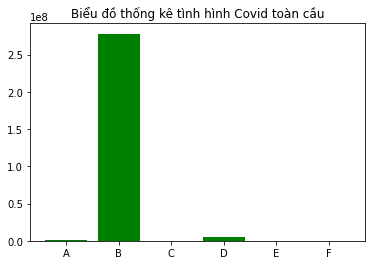

In [502]:
colum = [
    "A", # Số ca nhiễm mới
    "B", # Tổng số ca nhiễm
    "C", # Tổng số ca nhiễm
    "D", # Tổng số ca chết
    "E", # Số ca phục hồi mới
    "F", # Tổng số ca phục hồi
]
value = [
    ToanCau["NewConfirmed"],
    ToanCau["TotalConfirmed"],
    ToanCau["NewDeaths"],
    ToanCau["TotalDeaths"],
    ToanCau["NewRecovered"],
    ToanCau["TotalRecovered"],
]
plt.bar(colum, value, color = 'green')
plt.title("Biểu đồ thống kê tình hình Covid toàn cầu")
plt.show()

Trong đó:
- **A**: Số ca nhiễm mới
- **B**: Tổng số ca nhiễm
- **C**: Số ca chết mới
- **D**: Tổng số ca chết
- **E**: Số ca phục hồi mới
- **F**: Tổng số ca phục hồi

##### Thống kê theo từng quốc gia

In [562]:
QuocGia = scraping["Countries"]

**Liệt kê theo hàng**

In [563]:
for item in QuocGia:
    print("ID: {}\nQuốc gia: {}\nMã quốc gia: {}\nURL: {}\nSố ca nhiễm mới: {}\nTổng số ca nhiễm: {}\nSố ca chết mới: {}\nTổng số ca chết: {}\nSố ca phục hồi mới: {}\nTổng số ca phục hồi: {}\nThời gian cập nhật: {}\n"
          .format(
              item["ID"],
              item["Country"],
              item["CountryCode"],
              item["Slug"],
              item["NewConfirmed"],
              item["TotalConfirmed"],
              item["NewDeaths"],
              item["TotalDeaths"],
              item["NewRecovered"],
              item["TotalRecovered"],
              item["Date"],
          )
    )

ID: fb03c928-46f9-48c1-a1a9-c6b847c9f9ea
Quốc gia: Afghanistan
Mã quốc gia: AF
URL: afghanistan
Số ca nhiễm mới: 0
Tổng số ca nhiễm: 157887
Số ca chết mới: 0
Tổng số ca chết: 7348
Số ca phục hồi mới: 0
Tổng số ca phục hồi: 0
Thời gian cập nhật: 2021-12-25T06:43:11.404Z

ID: 0bbdf0d0-934a-4a63-9a3b-e34fd8c4b0f0
Quốc gia: Albania
Mã quốc gia: AL
URL: albania
Số ca nhiễm mới: 0
Tổng số ca nhiễm: 207221
Số ca chết mới: 0
Tổng số ca chết: 3187
Số ca phục hồi mới: 0
Tổng số ca phục hồi: 0
Thời gian cập nhật: 2021-12-25T06:43:11.404Z

ID: a084e51c-98cd-4254-bb52-e100cd5fa9fe
Quốc gia: Algeria
Mã quốc gia: DZ
URL: algeria
Số ca nhiễm mới: 0
Tổng số ca nhiễm: 216098
Số ca chết mới: 0
Tổng số ca chết: 6222
Số ca phục hồi mới: 0
Tổng số ca phục hồi: 0
Thời gian cập nhật: 2021-12-25T06:43:11.404Z

ID: 0406f7e9-8f40-4e12-b3c0-20ebfbb63afc
Quốc gia: Andorra
Mã quốc gia: AD
URL: andorra
Số ca nhiễm mới: 0
Tổng số ca nhiễm: 21730
Số ca chết mới: 0
Tổng số ca chết: 139
Số ca phục hồi mới: 0
Tổng số ca 

**Liệt kê theo bảng**

In [564]:
for item in QuocGia:
    data = {
        'Danh sách': [
            "ID",
            "Quốc gia",
            "Mã quốc gia",
            "URL",
            "Số ca nhiễm mới",
            "Tổng số ca nhiễm",
            "Số ca chết mới",
            "Tổng số ca chết",
            "Số ca phục hồi mới",
            "Tổng số ca phục hồi",
            "Thời gian cập nhật"
        ],
        'Thống kê': [
            item["ID"],
            item["Country"],
            item["CountryCode"],
            item["Slug"],
            item["NewConfirmed"],
            item["TotalConfirmed"],
            item["NewDeaths"],
            item["TotalDeaths"],
            item["NewRecovered"],
            item["TotalRecovered"],
            item["Date"]
        ]
    }
    table = pd.DataFrame(data, columns = [
        'Danh sách', 'Thống kê'
    ])
    print(table)
    print("")

              Danh sách                              Thống kê
0                    ID  fb03c928-46f9-48c1-a1a9-c6b847c9f9ea
1              Quốc gia                           Afghanistan
2           Mã quốc gia                                    AF
3                   URL                           afghanistan
4       Số ca nhiễm mới                                     0
5      Tổng số ca nhiễm                                157887
6        Số ca chết mới                                     0
7       Tổng số ca chết                                  7348
8    Số ca phục hồi mới                                     0
9   Tổng số ca phục hồi                                     0
10   Thời gian cập nhật              2021-12-25T06:43:11.404Z

              Danh sách                              Thống kê
0                    ID  0bbdf0d0-934a-4a63-9a3b-e34fd8c4b0f0
1              Quốc gia                               Albania
2           Mã quốc gia                                    AL
3      

10   Thời gian cập nhật              2021-12-25T06:43:11.404Z

              Danh sách                              Thống kê
0                    ID  442b6c78-003f-4a12-9f1f-d026fd217bca
1              Quốc gia                            Madagascar
2           Mã quốc gia                                    MG
3                   URL                            madagascar
4       Số ca nhiễm mới                                     0
5      Tổng số ca nhiễm                                 47295
6        Số ca chết mới                                     0
7       Tổng số ca chết                                   996
8    Số ca phục hồi mới                                     0
9   Tổng số ca phục hồi                                     0
10   Thời gian cập nhật              2021-12-25T06:43:11.404Z

              Danh sách                              Thống kê
0                    ID  21694cb7-cab1-4271-8fcf-90eb3785b979
1              Quốc gia                                Malawi
2     

10   Thời gian cập nhật              2021-12-25T06:43:11.404Z

              Danh sách                              Thống kê
0                    ID  c6d05d0d-d4b1-4df1-9a29-6a5b93757b7b
1              Quốc gia                                Turkey
2           Mã quốc gia                                    TR
3                   URL                                turkey
4       Số ca nhiễm mới                                     0
5      Tổng số ca nhiễm                               9268486
6        Số ca chết mới                                     0
7       Tổng số ca chết                                 81258
8    Số ca phục hồi mới                                     0
9   Tổng số ca phục hồi                                     0
10   Thời gian cập nhật              2021-12-25T06:43:11.404Z

              Danh sách                              Thống kê
0                    ID  47c3cb95-d845-4a30-8e7a-ce6ef15b4085
1              Quốc gia                                Uganda
2     

**Hiển thị 1 quốc gia theo tìm kiếm**

In [565]:
search = "Viet Nam"
for item in QuocGia:
    if item["Country"] == search:
        data = {
            'Danh sách': [
                "ID",
                "Quốc gia",
                "Mã quốc gia",
                "URL",
                "Số ca nhiễm mới",
                "Tổng số ca nhiễm",
                "Số ca chết mới",
                "Tổng số ca chết",
                "Số ca phục hồi mới",
                "Tổng số ca phục hồi",
                "Thời gian cập nhật"
            ],
            'Thống kê': [
                item["ID"],
                item["Country"],
                item["CountryCode"],
                item["Slug"],
                item["NewConfirmed"],
                item["TotalConfirmed"],
                item["NewDeaths"],
                item["TotalDeaths"],
                item["NewRecovered"],
                item["TotalRecovered"],
                item["Date"]
            ]
        }
        table = pd.DataFrame(data, columns = [
            'Danh sách', 'Thống kê'
        ])
table

,Danh sách,Thống kê
0,ID,8ec8d276-0fb9-4fca-a8a5-681976bcda22
1,Quốc gia,Viet Nam
2,Mã quốc gia,VN
3,URL,vietnam
4,Số ca nhiễm mới,0
5,Tổng số ca nhiễm,1620869
6,Số ca chết mới,0
7,Tổng số ca chết,30766
8,Số ca phục hồi mới,0
9,Tổng số ca phục hồi,0


**Vẽ biểu đồ 1 quốc gia theo tìm kiếm**

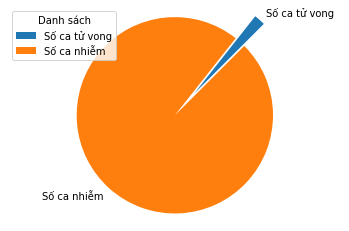

In [566]:
search = "Viet Nam"
region = ["Số ca tử vong", "Số ca nhiễm"]
for item in QuocGia:
    if item["Country"] == search:
        values = [
            item["TotalDeaths"],
            item["TotalConfirmed"]
        ]
# Độ nghiêng
Explode = [0.3, 0]
plt.pie(values, explode = Explode, labels = region, shadow = False, startangle = 45)
plt.axis('equal')
plt.legend(title = "Danh sách")
plt.show()

**Kết luận**: Từ biểu đồ ta dễ dàng nhận thấy tổng số ca nhiễm ở Việt Nam cho đến hiện tại rất lớn. Tuy nhiên, tỉ lệ tử vong chỉ chiếm một phần nhỏ.

*API chưa thống kê được số lượng người hồi phục sau nhiễm nên trên biểu đồ không có.*

**Vẽ biểu đồ so sánh 1 quốc gia với thế giới**

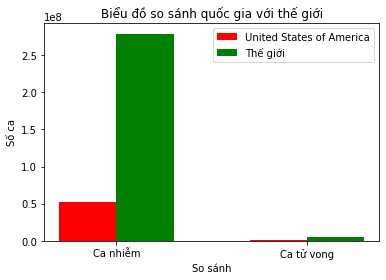

In [567]:
search = "United States of America"
colum = ["Ca nhiễm", "Ca tử vong"]
for item in QuocGia:
    if item["Country"] == search:
        valuesQuocGia = [
            item["TotalConfirmed"],
            item["TotalDeaths"]
        ]
valuesToanCau = [
    ToanCau["TotalConfirmed"],
    ToanCau["TotalDeaths"]
]
# Khoảng cách
index = np.arange(len(valuesQuocGia))
# Độ rộng của cột
width = 0.3
plt.bar(index, valuesQuocGia, width, color = 'red', label = search)
plt.bar(index + width, valuesToanCau, width, color = 'green', label = 'Thế giới')
plt.title("Biểu đồ so sánh quốc gia với thế giới")
plt.ylabel("Số ca")
plt.xlabel("So sánh")
# gắn trục x dựa trên vị trí các thanh
plt.xticks(index + width / 2, colum)
# Chú thích
plt.legend(loc = 'best')
plt.show()

**Kết luận**: Từ biểu đồ trên, ta thấy số lượng ca nhiễm và tử vong của nước Mỹ khá cao so với toàn thế giới.

#### Liệt kê tất cả các trường hợp từ trước đến nay theo quốc gia

Ở đây, chúng ta sẽ sử dụng API liệt kê tất cả các trường hợp theo quốc gia

- Link API: https://api.covid19api.com/dayone/country/:country

*Thay `:country` thành quốc gia cần liệt kê, ví dụ: https://api.covid19api.com/dayone/country/vietnam*

In [568]:
url = "https://api.covid19api.com/dayone/country/vietnam"
payload = {}
headers = {}
response = requests.request("GET", url, headers = headers, data = payload)
scraping = response.json()
scraping

[{'ID': '09a5955e-f234-4e63-a349-2483ca6c6725',
  'Country': 'Viet Nam',
  'CountryCode': 'VN',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '14.06',
  'Lon': '108.28',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-23T00:00:00Z'},
 {'ID': '5770e96a-f368-419b-9a20-8bce405fd4d1',
  'Country': 'Viet Nam',
  'CountryCode': 'VN',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '14.06',
  'Lon': '108.28',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-24T00:00:00Z'},
 {'ID': '733269b7-3e29-4508-8970-4ea8d6e82749',
  'Country': 'Viet Nam',
  'CountryCode': 'VN',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '14.06',
  'Lon': '108.28',
  'Confirmed': 2,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 2,
  'Date': '2020-01-25T00:00:00Z'},
 {'ID': 'b60ed82e-a78b-4a51-acc8-efadbe1ee72e',
  'Country': 'Viet Nam',
  'CountryCode': 'VN',
  'Province': '',
  'City': '',
  'CityCode': '',
  

##### Đếm số ngày

In [569]:
country = scraping
print("Tổng số ngày thu thập dữ liệu:", len(country))

Tổng số ngày thu thập dữ liệu: 703


##### Liệt kê theo bảng

In [570]:
for item in country:
    data = {
        'List': [
            "ID",
            "Quốc gia",
            "Mã quốc gia",
            "Tỉnh",
            "Thành phố",
            "Mã thành phố",
            "Lat",
            "Lon",
            "Số ca nhiễm",
            "Số ca tử vong",
            "Số ca phục hồi mới",
            "Tích cực",
            "Thời gian cập nhật"
        ],
        'Values': [
            item["ID"],
            item["Country"],
            item["CountryCode"],
            item["Province"],
            item["City"],
            item["CityCode"],
            item["Lat"],
            item["Lon"],
            item["Confirmed"],
            item["Deaths"],
            item["Recovered"],
            item["Active"],
            item["Date"]
        ]
    }
    table = pd.DataFrame(data, columns = [
        'List', 'Values'
    ])
    print(table)
    print("")

                  List                                Values
0                   ID  09a5955e-f234-4e63-a349-2483ca6c6725
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                     2
9        Số ca tử vong                                     0
10  Số ca phục hồi mới                                     0
11            Tích cực                                     2
12  Thời gian cập nhật                  2020-01-23T00:00:00Z

                  List                                Values
0                   ID  5770e96a-f368-419b-9a20-8bce405fd4d1
1             Quốc gia 

12  Thời gian cập nhật                  2020-04-17T00:00:00Z

                  List                                Values
0                   ID  31ff2890-a877-4234-9d00-66a944df8398
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                   268
9        Số ca tử vong                                     0
10  Số ca phục hồi mới                                   201
11            Tích cực                                    67
12  Thời gian cập nhật                  2020-04-18T00:00:00Z

                  List                                Values
0                   ID

12  Thời gian cập nhật                  2020-07-02T00:00:00Z

                  List                                Values
0                   ID  d3929ca2-d7ae-49d2-8c44-224e21aa7ea9
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                   355
9        Số ca tử vong                                     0
10  Số ca phục hồi mới                                   340
11            Tích cực                                    15
12  Thời gian cập nhật                  2020-07-03T00:00:00Z

                  List                                Values
0                   ID

12  Thời gian cập nhật                  2020-09-20T00:00:00Z

                  List                                Values
0                   ID  edd617bd-0628-487e-a6ed-93d142166fbc
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                  1068
9        Số ca tử vong                                    35
10  Số ca phục hồi mới                                   947
11            Tích cực                                    86
12  Thời gian cập nhật                  2020-09-21T00:00:00Z

                  List                                Values
0                   ID

12  Thời gian cập nhật                  2020-12-04T00:00:00Z

                  List                                Values
0                   ID  021fac60-da3c-437c-a776-431f01c44d46
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                  1365
9        Số ca tử vong                                    35
10  Số ca phục hồi mới                                  1220
11            Tích cực                                   110
12  Thời gian cập nhật                  2020-12-05T00:00:00Z

                  List                                Values
0                   ID

12  Thời gian cập nhật                  2021-02-01T00:00:00Z

                  List                                Values
0                   ID  3498090c-e975-4e79-b3af-5a1d10f26b66
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                  1882
9        Số ca tử vong                                    35
10  Số ca phục hồi mới                                  1460
11            Tích cực                                   387
12  Thời gian cập nhật                  2021-02-02T00:00:00Z

                  List                                Values
0                   ID

12  Thời gian cập nhật                  2021-03-08T00:00:00Z

                  List                                Values
0                   ID  0275cc29-374a-4768-bbf0-cc40f56cca7b
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                  2526
9        Số ca tử vong                                    35
10  Số ca phục hồi mới                                  2004
11            Tích cực                                   487
12  Thời gian cập nhật                  2021-03-09T00:00:00Z

                  List                                Values
0                   ID

12  Thời gian cập nhật                  2021-05-14T00:00:00Z

                  List                                Values
0                   ID  3e813d31-c8d4-4f63-beef-caf208597b81
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                  4112
9        Số ca tử vong                                    36
10  Số ca phục hồi mới                                  2668
11            Tích cực                                  1408
12  Thời gian cập nhật                  2021-05-15T00:00:00Z

                  List                                Values
0                   ID

12  Thời gian cập nhật                  2021-07-25T00:00:00Z

                  List                                Values
0                   ID  9d008882-a970-4836-a0ba-2a4280c2b5b3
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                106347
9        Số ca tử vong                                   524
10  Số ca phục hồi mới                                 21344
11            Tích cực                                 84479
12  Thời gian cập nhật                  2021-07-26T00:00:00Z

                  List                                Values
0                   ID

12  Thời gian cập nhật                  2021-10-10T00:00:00Z

                  List                                Values
0                   ID  942845a8-a5a3-42b8-8e0f-2d78a344ee4b
1             Quốc gia                              Viet Nam
2          Mã quốc gia                                    VN
3                 Tỉnh                                      
4            Thành phố                                      
5         Mã thành phố                                      
6                  Lat                                 14.06
7                  Lon                                108.28
8          Số ca nhiễm                                843281
9        Số ca tử vong                                 20670
10  Số ca phục hồi mới                                     0
11            Tích cực                                822611
12  Thời gian cập nhật                  2021-10-11T00:00:00Z

                  List                                Values
0                   ID

##### Tìm kiếm theo ngày

In [571]:
# Năm/tháng/ngày
inSearch = "2021-12-25"
search = inSearch + "T00:00:00Z"
for item in country:
    if item["Date"] == search:
        data = {
            'List': [
                "Thời gian",
                "Số ca nhiễm",
                "Số ca tử vong"
            ],
            'Values': [
                item["Date"],
                item["Confirmed"],
                item["Deaths"]
            ]
        }
        table = pd.DataFrame(data, columns = [
            'List', 'Values'
        ])
table  

,List,Values
0,Thời gian,2021-12-25T00:00:00Z
1,Số ca nhiễm,1620869
2,Số ca tử vong,30766


**Kết luận**: Ta có thể tìm kiếm dữ liệu về Covid theo ngày tuỳ chỉnh. Từ đó, chúng ta sẽ có một cái nhìn tổng quan nhất về tình hình dịch bệnh trong quá khứ và hiện tại.

### Tổng kết

📌 Tình hình dịch bệnh Covid diễn biến ngày càng phức tạp 🦠